In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [18]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Projects\Python\ML project 2 detect luekemia\balanced_leukemia_dataset.csv")

In [19]:
print(df.head())

   Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0  0.360986  3.969855 -2.105565  1.741668  0.220074  4.265436 -3.217825   
1  0.249370  2.812713 -1.549450  1.011026  0.983475  3.402184 -2.189652   
2  0.291880  3.827505  2.036851  2.736490 -1.473469 -2.034886 -2.059979   
3  0.845391 -0.275948  2.952059  0.763865 -1.086489 -1.544131 -2.032086   
4  1.693326  0.792148  2.737052 -0.535738 -2.896012 -1.890725 -3.685244   

   Feature8  Feature9  Feature10  Leukemia  
0 -1.611169  0.968103   1.637680         0  
1 -0.012143  0.242133   1.328913         0  
2  1.377607 -0.694781   2.431686         0  
3 -2.197913 -0.861363  -1.711200         0  
4  0.030675 -0.871775  -4.245451         0  


# Separate features and target


In [20]:
X = df.drop("Leukemia", axis=1)
y = df["Leukemia"]

# Split the data into train and test sets (75% train, 25% test)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Standardize the features

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Model

In [23]:

rf = RandomForestClassifier(random_state=42)

# Hyperparameter Grid for Random Forest
rf_params = {
    'n_estimators': [100, 200],     # Number of trees
    'max_depth': [5, 10, 20],       # Depth of trees
    'min_samples_split': [2, 5],     # Minimum samples to split a node
}

# GridSearchCV for Random Forest
rf_grid = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, verbose=1)
rf_grid.fit(X_train_scaled, y_train)

# Best Model from GridSearch
best_rf = rf_grid.best_estimator_
rf_preds = best_rf.predict(X_test_scaled)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


# Evaluate Random Forest

Best Params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       125
           1       0.98      0.98      0.98       125

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



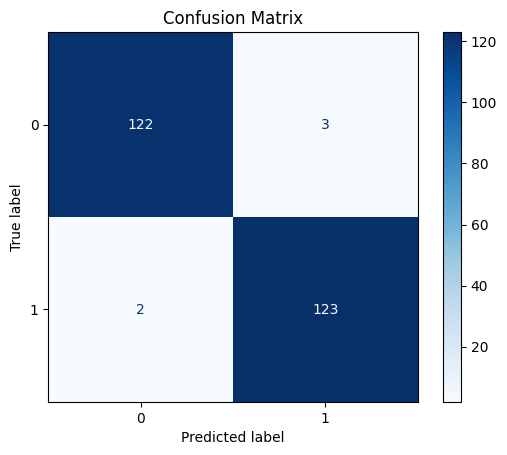

In [26]:
print("Best Params:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))
# Get confusion matrix
cm = confusion_matrix(y_test, rf_preds)

# Visualize it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

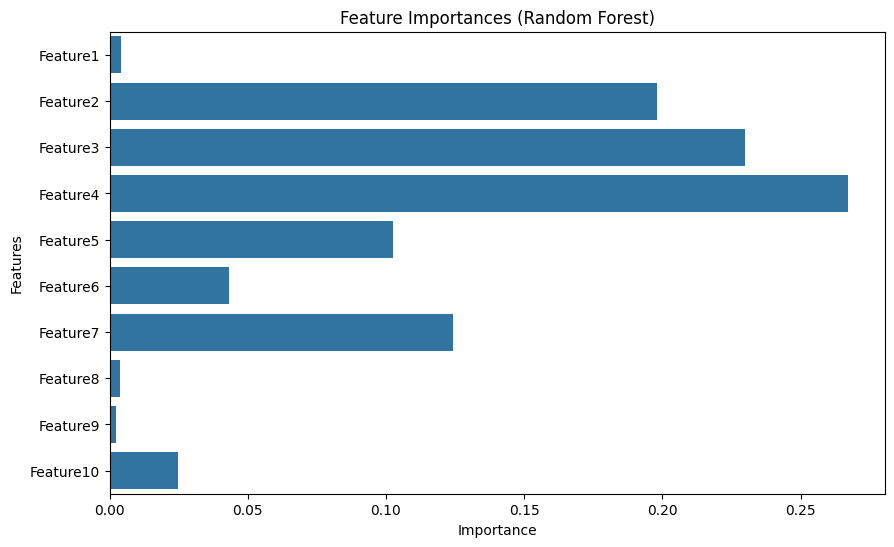

In [27]:
importances = best_rf.feature_importances_
feature_names = df.columns[:-1]  # Assuming last column is 'Leukemia'

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
